In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dir = "/content/drive/Shareddrives/ECS260-group5/dataset/npm/vuln/"
vuln_fname = dir + "top_2000_package_release_vulnCount.csv"

vuln_dat = pd.read_csv(vuln_fname)
vuln_dat.head()

,X,Rank,Language,Name,Release.Name,Release.Time,is_ok,num_vuln,critical,high,medium,low
0,0,1,JavaScript,vue-template-compiler,0.1.0,2016-06-10T15:47:48.751Z,True,NaN,NaN,NaN,NaN,NaN
1,1,1,JavaScript,vue-template-compiler,2.0.0-alpha.1,2016-06-10T23:23:27.189Z,True,NaN,NaN,NaN,NaN,NaN
2,2,1,JavaScript,vue-template-compiler,2.0.0-alpha.2,2016-06-13T23:36:41.487Z,True,NaN,NaN,NaN,NaN,NaN
3,3,1,JavaScript,vue-template-compiler,2.0.0-alpha.3,2016-06-15T18:22:31.815Z,True,NaN,NaN,NaN,NaN,NaN
4,4,1,JavaScript,vue-template-compiler,2.0.0-alpha.4,2016-06-16T17:00:42.859Z,True,NaN,NaN,NaN,NaN,NaN


In [4]:
vuln_cnt = dict()
severity = ['critical', 'high', 'medium', 'low']

for idx, row in vuln_dat.iterrows():
  pkg_name = row['Name']
  if pkg_name not in vuln_cnt:
    vuln_cnt[pkg_name] = {}
    for lvl in severity:
      vuln_cnt[pkg_name][lvl] = 0
    vuln_cnt[pkg_name]['num_versions'] = 0

In [5]:
# The number of packages that inspected using Snyk CLI
len(vuln_cnt)

1998

In [6]:
# Run this cell if you want to filter the most current releases
recent_releases = []

rank_buff = None
time_buff = None
row_buff = None

for idx, row in vuln_dat.iterrows():
  rank = row['Rank']
  time = row['Release.Time']

  if time_buff != None and rank_buff != rank:
    recent_releases.append(row_buff)
    rank_buff = rank
    time_buff = time
    row_buff = row
  elif time_buff == None or time_buff < time:
    rank_buff = rank
    time_buff = time
    row_buff = row
    

  if idx == vuln_dat.index[-1]: # end of the dataframe
    recent_releases.append(row_buff)

vuln_dat = pd.DataFrame(data=recent_releases, columns=vuln_dat.columns)
display(vuln_dat)

,X,Rank,Language,Name,Release.Name,Release.Time,is_ok,num_vuln,critical,high,medium,low
107,107,1,JavaScript,vue-template-compiler,2.6.14,2021-06-07T09:55:20.240Z,True,NaN,NaN,NaN,NaN,NaN
215,215,2,JavaScript,vue-server-renderer,2.6.14,2021-06-07T09:55:23.898Z,False,1,0.0,1.0,0.0,0.0
322,322,3,JavaScript,@vue/runtime-dom,3.2.22,2021-11-15T03:45:20.609Z,True,NaN,NaN,NaN,NaN,NaN
684,684,4,JavaScript,vue,3.2.22,2021-11-15T03:46:03.139Z,True,NaN,NaN,NaN,NaN,NaN
791,791,5,JavaScript,@vue/compiler-dom,3.2.22,2021-11-15T03:45:08.880Z,True,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
231381,231381,1996,JavaScript,lzma,2.3.2,2016-03-28T18:15:13.061Z,True,NaN,NaN,NaN,NaN,NaN
231407,231407,1997,JavaScript,falafel,2.2.4,2020-03-09T21:08:12.388Z,True,NaN,NaN,NaN,NaN,NaN
231458,231458,1998,JavaScript,swagger-express-middleware,4.0.2,2020-08-01T09:43:50.518Z,True,NaN,NaN,NaN,NaN,NaN
231471,231471,1999,JavaScript,esquery,1.4.0,2021-02-05T22:51:56.573Z,True,NaN,NaN,NaN,NaN,NaN


In [ ]:
for idx, row in vuln_dat.iterrows():
  pkg_name = row['Name']

  for lvl in severity:
    lvl_cnt = row[lvl]
    if np.isnan(lvl_cnt) or isinstance(lvl_cnt, str):
      lvl_cnt = 0

    vuln_cnt[pkg_name][lvl] += lvl_cnt
    vuln_cnt[pkg_name]['num_versions'] += 1

In [ ]:
print(vuln_cnt)

{'vue-template-compiler': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0, 'num_versions': 4}, 'vue-server-renderer': {'critical': 0.0, 'high': 1.0, 'medium': 0.0, 'low': 0.0, 'num_versions': 4}, '@vue/runtime-dom': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0, 'num_versions': 4}, 'vue': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0, 'num_versions': 4}, '@vue/compiler-dom': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0, 'num_versions': 4}, 'eslint-plugin-react-hooks': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0, 'num_versions': 4}, 'react-dom-factories': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0, 'num_versions': 4}, 'react-dom': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0, 'num_versions': 4}, 'react-addons-css-transition-group': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0, 'num_versions': 4}, 'react-addons-pure-render-mixin': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0, 'num_versions': 4}, 'schedule': {'critical': 0, 'high': 0, 'medium': 0, 'low': 

In [ ]:
vuln_cnt_by_severity = {}

# initialize accumulator
for lvl in severity:
  vuln_cnt_by_severity[lvl] = 0

for vuln_value in vuln_cnt.values():
  for lvl in severity:
    vuln_cnt_by_severity[lvl] += vuln_value[lvl]

print(vuln_cnt_by_severity)

{'critical': 35.0, 'high': 613.0, 'medium': 2279.0, 'low': 107.0}


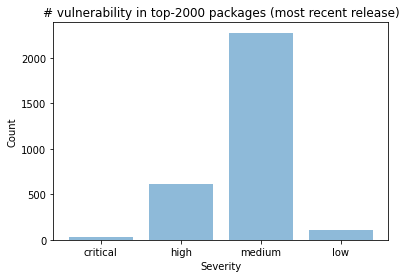

In [ ]:
# data set
objects = [d[0] for d in vuln_cnt_by_severity.items()]
y_pos = np.arange(len(objects))
performance = [d[1] for d in vuln_cnt_by_severity.items()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Severity')
plt.ylabel('Count')
plt.title('# vulnerability in top-2000 packages (most recent release)')

plt.show()

In [7]:
# Vulnerability through dependency
vuln_thr_dep_fname = dir + 'top_2000_package_release_vulnCount_had_vuln_vulnDetails.tsv'
vuln_thr_dep = pd.read_csv(vuln_thr_dep_fname, sep='\t')

display(vuln_thr_dep)

,X,Rank,Language,Name,Release.Name,Release.Time,is_ok,vulnIndex,creationTime,disclosureTime,modificationTime,publicationTime,severity,title,path,pathDepth,rootPackage,rootPackageVersion,upgradePath,isUpgradable,isPatchable,isPinnable
0,153,2,JavaScript,vue-server-renderer,2.2.0-beta.1,2017-02-24T04:22:20.147Z,False,1,2019-12-06T13:12:07.212567Z,2019-12-01T20:30:14Z,2020-06-12T14:36:56.474994Z,2019-12-05T20:30:14Z,high,Cross-site Scripting (XSS),"[vue-server-renderer@2.2.0-beta.1, vue-ssr-htm...",3,serialize-javascript,1.9.1,"[False, False, serialize-javascript@2.1.1]",False,False,False
1,153,2,JavaScript,vue-server-renderer,2.2.0-beta.1,2017-02-24T04:22:20.147Z,False,2,2020-05-21T13:30:45.255980Z,2020-05-19T21:00:00Z,2020-06-01T07:03:01.034145Z,2020-06-01T07:03:01Z,high,Arbitrary Code Injection,"[vue-server-renderer@2.2.0-beta.1, vue-ssr-htm...",3,serialize-javascript,1.9.1,"[False, False, serialize-javascript@3.1.0]",False,False,False
2,154,2,JavaScript,vue-server-renderer,2.2.0-beta.2,2017-02-25T00:01:09.693Z,False,1,2019-12-06T13:12:07.212567Z,2019-12-01T20:30:14Z,2020-06-12T14:36:56.474994Z,2019-12-05T20:30:14Z,high,Cross-site Scripting (XSS),"[vue-server-renderer@2.2.0-beta.2, vue-ssr-htm...",3,serialize-javascript,1.9.1,"[False, False, serialize-javascript@2.1.1]",False,False,False
3,154,2,JavaScript,vue-server-renderer,2.2.0-beta.2,2017-02-25T00:01:09.693Z,False,2,2020-05-21T13:30:45.255980Z,2020-05-19T21:00:00Z,2020-06-01T07:03:01.034145Z,2020-06-01T07:03:01Z,high,Arbitrary Code Injection,"[vue-server-renderer@2.2.0-beta.2, vue-ssr-htm...",3,serialize-javascript,1.9.1,"[False, False, serialize-javascript@3.1.0]",False,False,False
4,155,2,JavaScript,vue-server-renderer,2.2.0,2017-02-26T04:28:14.418Z,False,1,2019-12-06T13:12:07.212567Z,2019-12-01T20:30:14Z,2020-06-12T14:36:56.474994Z,2019-12-05T20:30:14Z,high,Cross-site Scripting (XSS),"[vue-server-renderer@2.2.0, vue-ssr-html-strea...",3,serialize-javascript,1.9.1,"[False, False, serialize-javascript@2.1.1]",False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647067,231451,1998,JavaScript,swagger-express-middleware,2.0.3,2019-08-24T17:34:24.007Z,False,1,2017-02-14T11:44:54.163000Z,2017-02-13T00:00:00Z,2020-06-12T14:36:53.880024Z,2017-03-01T10:00:54Z,high,Prototype Override Protection Bypass,"[swagger-express-middleware@2.0.3, multer@0.1....",3,qs,1.2.2,[swagger-express-middleware@3.0.0],True,False,False
1647068,231452,1998,JavaScript,swagger-express-middleware,2.0.4,2019-10-24T13:06:08.844Z,False,1,2017-02-14T11:44:54.163000Z,2017-02-13T00:00:00Z,2020-06-12T14:36:53.880024Z,2017-03-01T10:00:54Z,high,Prototype Override Protection Bypass,"[swagger-express-middleware@2.0.4, multer@0.1....",3,qs,1.2.2,[swagger-express-middleware@3.0.0],True,False,False
1647069,231453,1998,JavaScript,swagger-express-middleware,2.0.5,2019-12-31T12:48:31.103Z,False,1,2017-02-14T11:44:54.163000Z,2017-02-13T00:00:00Z,2020-06-12T14:36:53.880024Z,2017-03-01T10:00:54Z,high,Prototype Override Protection Bypass,"[swagger-express-middleware@2.0.5, multer@0.1....",3,qs,1.2.2,[swagger-express-middleware@3.0.0],True,False,False
1647070,231454,1998,JavaScript,swagger-express-middleware,3.0.0,2020-03-15T13:02:50.360Z,False,1,2017-02-14T11:44:54.163000Z,2017-02-13T00:00:00Z,2020-06-12T14:36:53.880024Z,2017-03-01T10:00:54Z,high,Prototype Override Protection Bypass,"[swagger-express-middleware@3.0.0, @apidevtool...",4,qs,1.2.2,"[False, False, multer@1.0.0]",False,False,False


In [8]:
# Run this cell if you want to filter the most current releases
recent_releases = []

name_buff = None
recent_release_buff = None

for idx, row in vuln_thr_dep.iterrows():
  name = row['Name']
  if name != name_buff:
    name_buff = name
    recent_release_data = vuln_dat.loc[vuln_dat['Name'] == name]
    recent_release_name = recent_release_data['Release.Name'].iloc[0]
    recent_release_buff = recent_release_name

  release_name = row['Release.Name']
  if release_name == recent_release_buff:
    recent_releases.append(row)

recent_vuln_thr_dep = pd.DataFrame(data=recent_releases, columns=vuln_thr_dep.columns)
display(recent_vuln_thr_dep)

,X,Rank,Language,Name,Release.Name,Release.Time,is_ok,vulnIndex,creationTime,disclosureTime,modificationTime,publicationTime,severity,title,path,pathDepth,rootPackage,rootPackageVersion,upgradePath,isUpgradable,isPatchable,isPinnable
172,215,2,JavaScript,vue-server-renderer,2.6.14,2021-06-07T09:55:23.898Z,False,1,2021-03-22T12:03:39.360085Z,2020-11-17T13:02:10Z,2021-03-22T16:47:54.074243Z,2021-02-15T11:50:50Z,high,Command Injection,"[vue-server-renderer@2.6.14, lodash.template@4...",2,lodash.template,4.5.0,[],False,False,False
3436,4570,24,JavaScript,d3,7.1.1,2021-10-03T03:19:07.780Z,False,1,2021-02-18T13:32:47.195986Z,2021-02-18T13:30:50Z,2021-10-10T14:25:49.229947Z,2021-07-05T14:17:56Z,medium,Regular Expression Denial of Service (ReDoS),"[d3@7.1.1, d3-color@3.0.1]",2,d3-color,3.0.1,[],False,False,False
3437,4570,24,JavaScript,d3,7.1.1,2021-10-03T03:19:07.780Z,False,2,2021-02-18T13:32:47.195986Z,2021-02-18T13:30:50Z,2021-10-10T14:25:49.229947Z,2021-07-05T14:17:56Z,medium,Regular Expression Denial of Service (ReDoS),"[d3@7.1.1, d3-interpolate@3.0.1, d3-color@3.0.1]",3,d3-color,3.0.1,[],False,False,False
3438,4570,24,JavaScript,d3,7.1.1,2021-10-03T03:19:07.780Z,False,3,2021-02-18T13:32:47.195986Z,2021-02-18T13:30:50Z,2021-10-10T14:25:49.229947Z,2021-07-05T14:17:56Z,medium,Regular Expression Denial of Service (ReDoS),"[d3@7.1.1, d3-transition@3.0.1, d3-color@3.0.1]",3,d3-color,3.0.1,[],False,False,False
3439,4570,24,JavaScript,d3,7.1.1,2021-10-03T03:19:07.780Z,False,4,2021-02-18T13:32:47.195986Z,2021-02-18T13:30:50Z,2021-10-10T14:25:49.229947Z,2021-07-05T14:17:56Z,medium,Regular Expression Denial of Service (ReDoS),"[d3@7.1.1, d3-scale-chromatic@3.0.0, d3-color@...",3,d3-color,3.0.1,[],False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643364,230065,1956,JavaScript,gulp-notify,4.0.0,2021-04-22T18:48:02.518Z,False,1,2021-03-22T12:03:39.360085Z,2020-11-17T13:02:10Z,2021-03-22T16:47:54.074243Z,2021-02-15T11:50:50Z,high,Command Injection,"[gulp-notify@4.0.0, lodash.template@4.5.0]",2,lodash.template,4.5.0,[],False,False,False
1644123,230726,1978,JavaScript,unzip,0.1.11,2014-09-09T03:33:30.865Z,False,1,2019-05-15T17:00:15.452305Z,2019-05-15T14:22:26Z,2020-06-12T14:36:56.472350Z,2019-05-15T17:00:42Z,high,Arbitrary File Overwrite,"[unzip@0.1.11, fstream@0.1.31]",2,fstream,0.1.31,"[False, fstream@1.0.12]",True,False,False
1644133,230736,1979,TypeScript,apollo-fetch,0.7.0,2017-12-06T05:04:06.142Z,False,1,2020-09-11T10:50:56.354201Z,2020-09-10T17:55:53Z,2020-09-11T14:12:46.019991Z,2020-09-11T14:12:46Z,medium,Denial of Service,"[apollo-fetch@0.7.0, cross-fetch@1.1.1, node-f...",3,node-fetch,1.7.3,"[False, cross-fetch@2.2.4, node-fetch@2.6.1]",True,False,False
1646399,231274,1993,JavaScript,gulp-eslint,6.0.0,2019-06-28T16:56:42.582Z,False,1,2021-09-09T14:28:31.617043Z,2021-09-09T14:27:43Z,2021-09-23T15:49:52.792982Z,2021-09-12T12:52:37Z,high,Regular Expression Denial of Service (ReDoS),"[gulp-eslint@6.0.0, eslint@6.8.0, strip-ansi@5...",4,ansi-regex,4.1.0,"[False, eslint@7.0.0, strip-ansi@6.0.0, ansi-r...",True,False,False


In [9]:
vuln_category = set()

for idx, row in recent_vuln_thr_dep.iterrows():
  vuln_title = row['title']
  vuln_category.add(vuln_title)

print(len(vuln_category))
print(vuln_category)

61
{'Heap-based Buffer Overflow', 'Insufficient Validation', 'Insecure Credential Storage', 'Authentication Bypass', 'Improper Access Control', 'Prototype Override Protection Bypass', 'Denial of Service', 'Insecure Defaults', 'Access of Resource Using Incompatible Type (Type Confusion)', 'Prototype Pollution', 'Out Of Bounds Read', 'Integer Overflow', 'Arbitrary File Write via Archive Extraction (Zip Slip)', 'Arbitrary Code Execution', 'Out-of-bounds Write', 'Remote Memory Exposure', 'Type Confusion', 'Directory Traversal', 'Sandbox Bypass', 'Information Exposure', 'Out-of-bounds', 'NULL Pointer Dereference', 'Integer Overflow or Wraparound', 'Site Isolation Bypass', 'Heap Overflow', 'Arbitrary Code Injection', 'Arbitrary File Read', 'Insecure use of /tmp folder', 'XML External Entity (XXE) Injection', 'Improper minification of non-boolean comparisons', 'Root Path Disclosure', 'Arbitrary File Overwrite', 'Improper Input Validation', 'Non-Constant Time String Comparison', 'Timing Attack

In [10]:
vuln_cat_cnt = dict()
for item in vuln_category:
  vuln_cat_cnt[item] = 0

for idx, row in recent_vuln_thr_dep.iterrows():
  vuln_title = row['title']
  vuln_cat_cnt[vuln_title] += 1

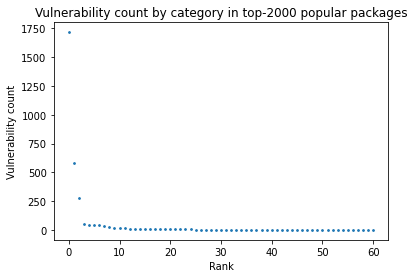

In [11]:
sorted_vuln_cat_cnt = sorted(vuln_cat_cnt.items(), reverse=True, key = lambda d: d[1])

y = [d[1] for d in sorted_vuln_cat_cnt]
x = [i for i in range(0,61)]

plt.xlabel('Rank')
plt.ylabel('Vulnerability count')
plt.title('Vulnerability count by category in top-2000 popular packages')
plt.scatter(x, y, s=3)

In [12]:
# vuln category that has more than 10 datapoint
freq_vuln = sorted_vuln_cat_cnt[:3]
sum_others = sum([d[1] for d in sorted_vuln_cat_cnt[3:]])
freq_vuln.append(('Others',sum_others))
freq_vuln

[('Arbitrary Code Injection', 1715),
 ('Regular Expression Denial of Service (ReDoS)', 585),
 ('Prototype Pollution', 281),
 ('Others', 453)]

In [13]:
sum([d[1] for d in sorted_vuln_cat_cnt])

3034

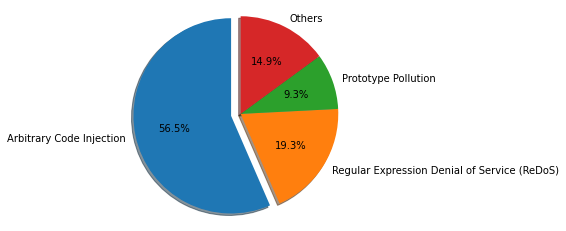

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [d[0] for d in freq_vuln]
sizes = [d[1] * 100 / 1715 for d in freq_vuln]
explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [20]:
vuln_cnt = dict()
severity_cat = ['critical', 'high', 'medium', 'low']
vuln_depth = ['self', 'direct', 'indirect']

for idx, row in recent_vuln_thr_dep.iterrows():
  pkg_name = row['Name']
  if pkg_name not in vuln_cnt:
    vuln_cnt[pkg_name] = {}
    for path in vuln_depth:
      vuln_cnt[pkg_name][path] = {}
      for lvl in severity_cat:
        vuln_cnt[pkg_name][path][lvl] = 0

print(len(vuln_cnt))
print(vuln_cnt)

153
{'vue-server-renderer': {'self': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0}, 'direct': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0}, 'indirect': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0}}, 'd3': {'self': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0}, 'direct': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0}, 'indirect': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0}}, 'react-native': {'self': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0}, 'direct': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0}, 'indirect': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0}}, 'react-scripts': {'self': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0}, 'direct': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0}, 'indirect': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0}}, 'material-ui': {'self': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0}, 'direct': {'critical': 0, 'high': 0, 'medium': 0, 'low': 0}, 'indirect': {'critical': 0, 'high': 0, 'medium': 0, 'low'

In [21]:
for idx, row in recent_vuln_thr_dep.iterrows():
  name = row['Name']
  severity = row['severity']
  pathDepth = row['pathDepth']

  if pathDepth == 1: vul_depth_category = 'self'
  elif pathDepth == 2: vul_depth_category = 'direct'
  elif pathDepth > 2: vul_depth_category = 'indirect'

  vuln_cnt[pkg_name][vul_depth_category][severity] += 1

In [22]:
self_vuln_cnt_by_severity = {}
direct_vuln_cnt_by_severity = {}
indirect_vuln_cnt_by_severity = {}

# initialize accumulator
for lvl in severity_cat:
  self_vuln_cnt_by_severity[lvl] = 0
  direct_vuln_cnt_by_severity[lvl] = 0
  indirect_vuln_cnt_by_severity[lvl] = 0

for vuln_cnt_by_depth in vuln_cnt.values():
  for vuln_cnt_by_depth_tuple in vuln_cnt_by_depth.items():
    depth = vuln_cnt_by_depth_tuple[0]
    vuln_cnt_by_severity = vuln_cnt_by_depth_tuple[1]
    
    if depth == 'self':
      for lvl in severity_cat:
        self_vuln_cnt_by_severity[lvl] += vuln_cnt_by_severity[lvl]
    elif depth == 'direct':
      for lvl in severity_cat:
        direct_vuln_cnt_by_severity[lvl] += vuln_cnt_by_severity[lvl]
    elif depth == 'indirect':
      for lvl in severity_cat:
        indirect_vuln_cnt_by_severity[lvl] += vuln_cnt_by_severity[lvl]

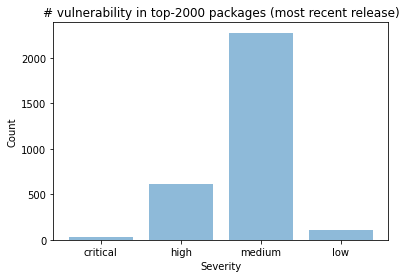

In [23]:
# data set
objects = severity_cat
y_pos = np.arange(len(objects))
performance = [ self_vuln_cnt_by_severity[lvl] + 
               direct_vuln_cnt_by_severity[lvl] + 
               indirect_vuln_cnt_by_severity[lvl] for lvl in objects]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Severity')
plt.ylabel('Count')
plt.title('# vulnerability in top-2000 packages (most recent release)')

plt.show()

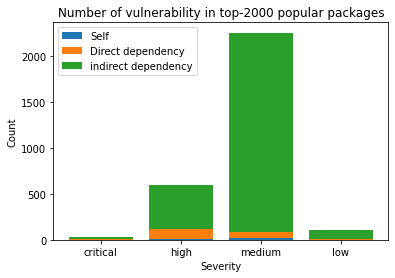

In [56]:
# data set
x = severity_cat
y1 = [ self_vuln_cnt_by_severity[lvl] for lvl in objects]
y2 = [ direct_vuln_cnt_by_severity[lvl] for lvl in objects]
y3 = [ indirect_vuln_cnt_by_severity[lvl] for lvl in objects]

# plot stacked bar chart 
plt.bar(x, y1, label = 'Self')
plt.bar(x, y2, bottom=y1, label = 'Direct dependency')
plt.bar(x, y3, bottom=y2, label = 'indirect dependency')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.title('Number of vulnerability in top-2000 popular packages')
plt.legend()
plt.show()

In [26]:
self_sum = sum(self_vuln_cnt_by_severity.values())
dir_sum = sum(direct_vuln_cnt_by_severity.values())
dep_sum = sum(indirect_vuln_cnt_by_severity.values())
total = [self_sum, dir_sum, dep_sum]

print(self_sum)
print(dir_sum)
print(dep_sum)
print(sum(total))

40
221
2773
3034


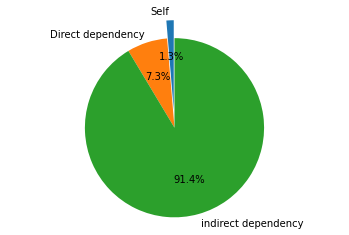

In [45]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Self', 'Direct dependency', 'indirect dependency']
sizes = [cnt_sum * 100 / sum(total) for cnt_sum in total]
explode = (0.2, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

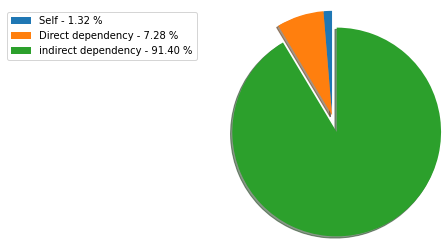

In [65]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
depth_cat = ['Self', 'Direct dependency', 'indirect dependency']
sizes = [cnt_sum * 100 / sum(total) for cnt_sum in total]
explode = (0, 0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(depth_cat, sizes)]
patches, texts = plt.pie(sizes, explode=explode, 
                         shadow=True, startangle=90, radius=1.2)

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
    
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8, prop={'size': 10})

plt.show()